In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import lib.dataset as dataset
import lib.network as network
import lib.utils as utils
import lib.vis as vis
from PIL import Image
from collections import deque
from tensorflow.python.tools import inspect_checkpoint
from moviepy.editor import *

Using TensorFlow backend.


In [10]:
epoch_dir="aws/model_2018-04-15_18:14:22/epoch_1"
net=network.Network_restored(epoch_dir)
x,y=dataset.load_preprocessed_sample()
yp=net.predict(x)

INFO:tensorflow:Restoring parameters from b'aws/model_2018-04-15_18:14:22/epoch_1/model/variables/variables'


INFO:tensorflow:Restoring parameters from b'aws/model_2018-04-15_18:14:22/epoch_1/model/variables/variables'


  "matplotlib is currently using a non-GUI backend, "



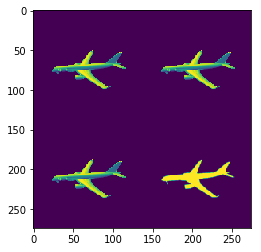

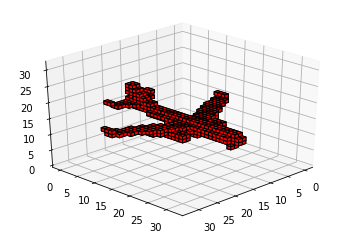

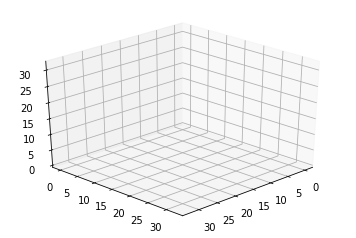

In [11]:
vis.multichannel(x[0])
vis.softmax(y)
vis.softmax(yp[0])

In [9]:
yp.shape

(1, 32, 32, 32, 2)

In [ ]:
loss_paths = utils.construct_path_lists("aws", "loss.npy")
for path in loss_paths:
    print(path)
    print(utils.grep_learning_rate(path))
    loss_arr = np.load(path)
    print(loss_arr.shape)
    plt.plot(loss_arr.flat)
    plt.show()

In [ ]:
p=np.load("voxel_prediction.npy")
p=np.transpose(p,[0,1,3,4,2])

In [ ]:
vp=np.load("voxel_prediction.npy")[23]
vp=np.transpose(vp,[0,2,3,1])
vis.softmax(vp)

In [ ]:

vis.softmax(p[0])

In [ ]:
weights=np.load("/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/data/ResidualGRUNet.npy")

In [ ]:
l=utils.list_folders("aws")[-1]
png_ls=utils.construct_path_lists("aws/model_2018-04-02_20:10:12_L:0.1_E:40_B:16", "_p.png")

In [ ]:
png_ls

In [ ]:
for f in png_ls:
    obj_id=utils.grep_obj_id(f)
    n=utils.grep_stepcount(f)
    new_name=os.path.dirname(f)+"/"+n+'_'+obj_id+'_yp.png'
#     print(f,new_name)
    os.rename(f,new_name)
    

In [ ]:
png_ls

In [ ]:
Image.open(png_ls[2])

In [ ]:
clip=ImageSequenceClip(png_ls,1)

In [ ]:
clip.write_videofile("movie.mp4")